##Library Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


##Data Import

In [3]:
# Importing File
df = pd.read_csv('/content/drive/MyDrive/Placement_projects/House_Rent_Dataset.csv')
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [4]:
df.dtypes

Posted On            object
BHK                   int64
Rent                  int64
Size                  int64
Floor                object
Area Type            object
Area Locality        object
City                 object
Furnishing Status    object
Tenant Preferred     object
Bathroom              int64
Point of Contact     object
dtype: object

In [5]:
df['Posted On'] = pd.to_datetime(df['Posted On'])

In [6]:
df.dtypes

Posted On            datetime64[ns]
BHK                           int64
Rent                          int64
Size                          int64
Floor                        object
Area Type                    object
Area Locality                object
City                         object
Furnishing Status            object
Tenant Preferred             object
Bathroom                      int64
Point of Contact             object
dtype: object

In [7]:
df.isnull().values.any()

False

In [8]:
df.isna().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

##Exploratory Data Analysis

In [9]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


<Axes: >

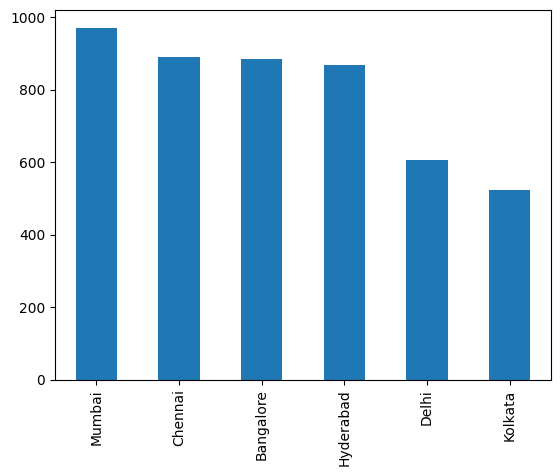

In [10]:
# sns.countplot(df['BHK'])
df['City'].value_counts().plot(kind='bar')

<ipython-input-11-b0c51dc96b57>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Rent'])


3500000
1200


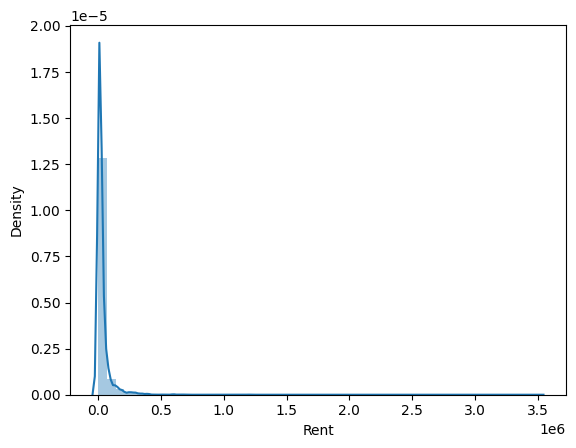

In [11]:
sns.distplot(df['Rent'])
print(df['Rent'].max())
print(df['Rent'].min())
# sns.boxplot(df['Rent'])

### we need to fix this skewed distribution, so we  will apply transform

<ipython-input-12-c578af6adab8>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Size'])


<Axes: xlabel='Size', ylabel='Density'>

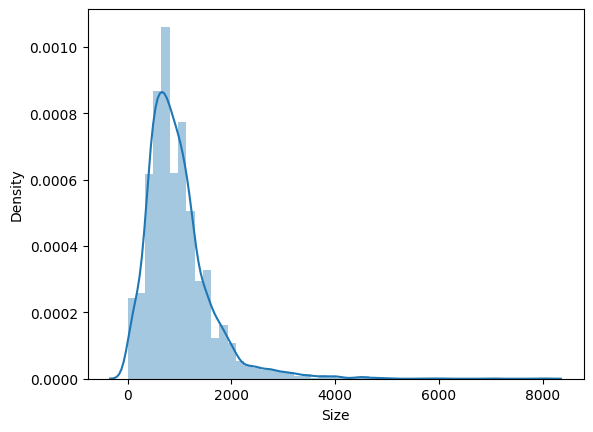

In [12]:
# plt.hist(df['Size'])
##Size almost follws normal distn, so no need of tranform
sns.distplot(df['Size'])

In [13]:
### Before applying transformer to rent column we will check if the outlier are there or not
df['Rent'].describe()

count    4.746000e+03
mean     3.499345e+04
std      7.810641e+04
min      1.200000e+03
25%      1.000000e+04
50%      1.600000e+04
75%      3.300000e+04
max      3.500000e+06
Name: Rent, dtype: float64

<Axes: >

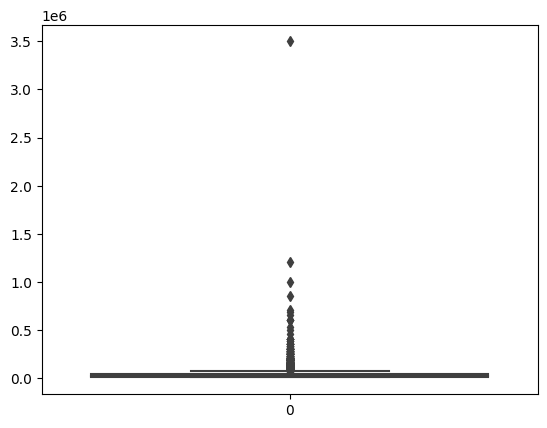

In [14]:
sns.boxplot(df['Rent'])

In [15]:
# Removal of outliers by percentile method
upper_limit = df['Rent'].quantile(0.99)
print(upper_limit)

lower_limit = df['Rent'].quantile(0.01)
print(lower_limit)

300000.0
4000.0


In [16]:
##Avoided the column which doesnt satisfy the below condition
df_clean = df[(df['Rent'] <= upper_limit) & (df['Rent'] >= lower_limit)]
df_clean['Rent'] = np.log(df['Rent'])
print(df.shape)
print(df_clean.shape)

(4746, 12)
(4671, 12)


<ipython-input-16-419861efb200>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Rent'] = np.log(df['Rent'])


In [17]:
df_clean.head()

# a = np.array(data)[:, :-1]  # Features (all columns except the target column)
# print(a)
# b = np.array(data)[:, -1]   # Target column

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,9.210340,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,9.903488,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,9.740969,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,9.210340,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,8.922658,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


<ipython-input-18-6acef139c4d1>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_clean['Rent'])


<Axes: xlabel='Rent', ylabel='Density'>

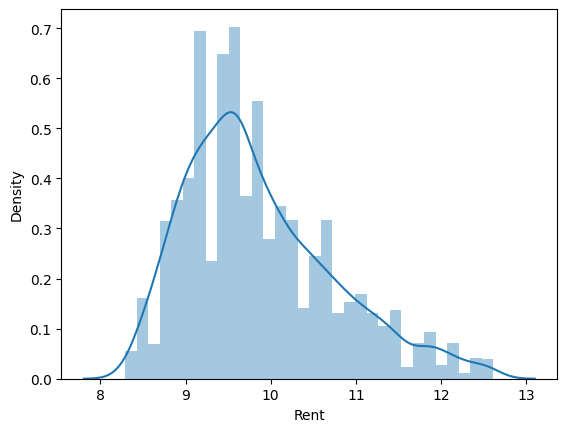

In [18]:
sns.distplot(df_clean['Rent'])

After outlier removal and log transformtion of Rent have a normal distribution

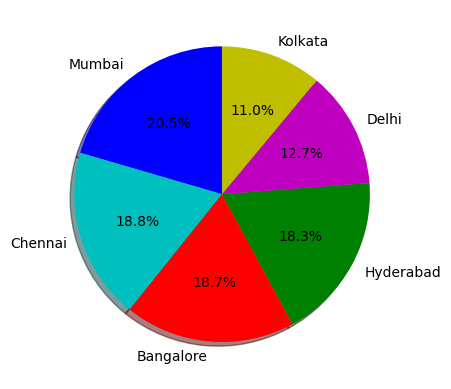

In [19]:
labels = ['Mumbai', 'Chennai', 'Bangalore', 'Hyderabad', 'Delhi', 'Kolkata']
colour = ['b', 'c', 'r', 'g', 'm', 'y']
explode = [0,0,0,0,0,0]
plt.pie(df['City'].value_counts(), labels = labels, autopct='%1.1f%%',
       radius = 1, shadow=True, startangle=90, explode = explode,
   colors = colour)

plt.show()

In [20]:
df['City'].value_counts()

Mumbai       972
Chennai      891
Bangalore    886
Hyderabad    868
Delhi        605
Kolkata      524
Name: City, dtype: int64

Text(0, 0.5, 'Count')

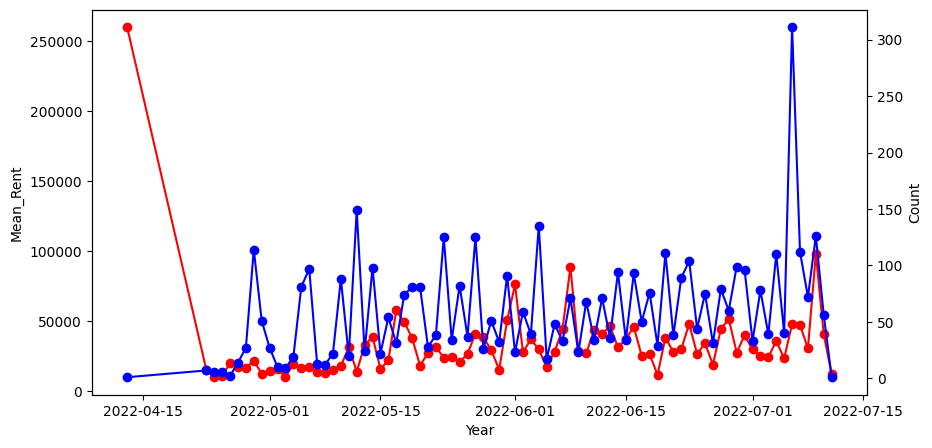

In [21]:
df2 = df[['Posted On', 'Rent']]
# print(df2)
df2.set_index('Posted On', inplace=True)
# print(df2)
df_date = df2.groupby('Posted On').mean()

df_date1 = df2.groupby('Posted On').count().rename(columns = {'Rent': 'Count'})
# Set the display option to show all rows
pd.set_option('display.max_rows', 20)
# print(df_date1)

fig,ax = plt.subplots(figsize =(10,5))
ax.plot(df_date,
        color="red",
        marker="o")

ax.set_xlabel("Year",fontsize=10)
ax.set_ylabel("Mean_Rent",fontsize=10)

ax2 = ax.twinx()
ax2.plot(df_date1['Count'],color="blue",marker="o")
ax2.set_ylabel("Count",fontsize=10)

In [22]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


Text(0, 0.5, 'Size')

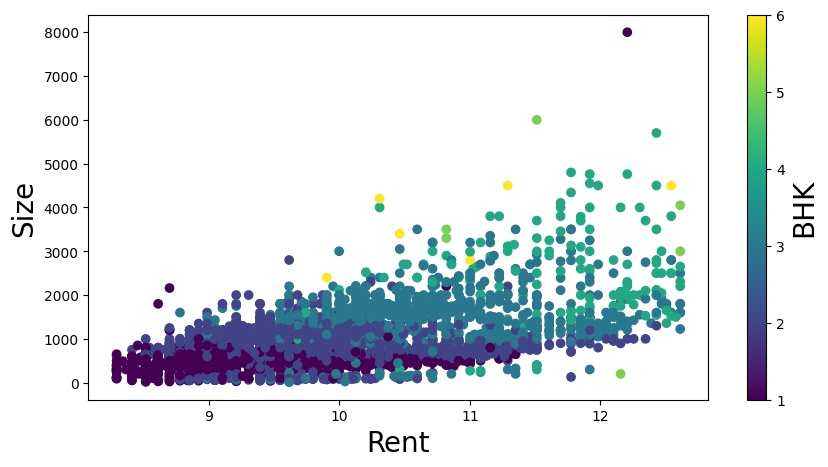

In [23]:
plt.figure(figsize=(10,5))
plt.scatter(df_clean['Rent'], df_clean['Size'],c=df_clean['BHK'])
cb= plt.colorbar()
cb.set_label('BHK', fontsize=20)
plt.xlabel('Rent', fontsize=20)
plt.ylabel('Size', fontsize=20)

As the Rent and Size increases the BHK also increases.

#Data Preprocessing

In [24]:
# As the posted on days influences the rent,so we find the posted days and drop the posted on column
# also we split the input and output data

df_clean['day name'] = df_clean['Posted On'].dt.day_name()
y = df_clean['Rent']
x=df_clean.drop(['Rent', 'Posted On'],axis=1)
x


# x.set_index('BHK', inplace=True)
# print(x)

<ipython-input-24-6e88234a89f1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['day name'] = df_clean['Posted On'].dt.day_name()


,BHK,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,day name
0,2,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,Wednesday
1,2,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,Friday
2,2,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,Monday
3,2,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,Monday
4,2,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,Monday
...,...,...,...,...,...,...,...,...,...,...,...
4741,2,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner,Wednesday
4742,3,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner,Sunday
4743,3,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent,Sunday
4744,3,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent,Wednesday


      BHK  Size  Bathroom
0       2  1100         2
1       2   800         1
2       2  1000         1
3       2   800         1
4       2   850         1
...   ...   ...       ...
4741    2  1000         2
4742    3  2000         3
4743    3  1750         3
4744    3  1500         2
4745    2  1000         2

[4671 rows x 3 columns]


<ipython-input-25-96e70592eb21>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_clean['Bathroom'])


<Axes: xlabel='Bathroom', ylabel='Density'>

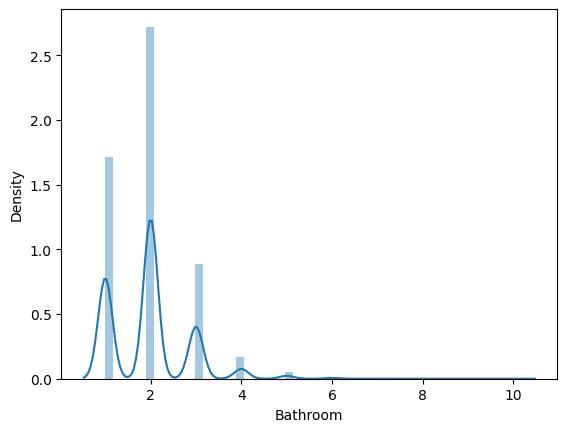

In [25]:
x_num=x.select_dtypes(include='number')
x_cat=x.select_dtypes(exclude='number')
print(x_num)
sns.distplot(df_clean['Bathroom'])

Text(0, 0.5, 'Rent')

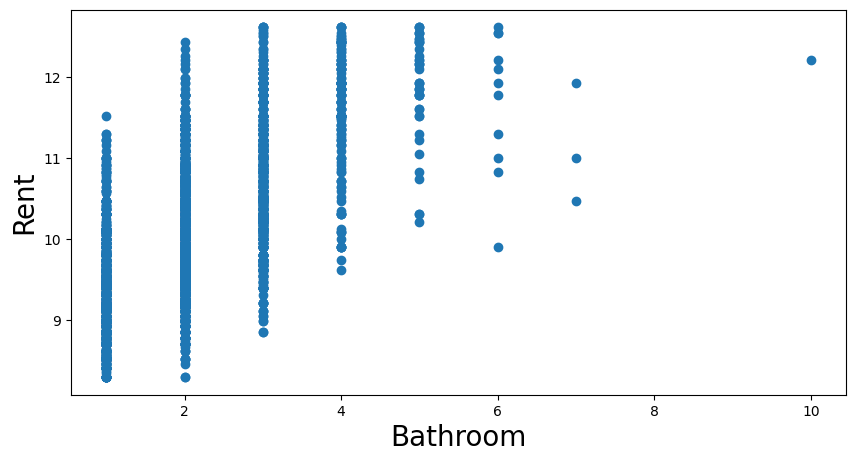

In [26]:
plt.figure(figsize=(10,5))
plt.scatter(df_clean['Bathroom'],df_clean['Rent'])
plt.xlabel('Bathroom', fontsize=20)
plt.ylabel('Rent', fontsize=20)

#Numerical Feature Selection

<Axes: >

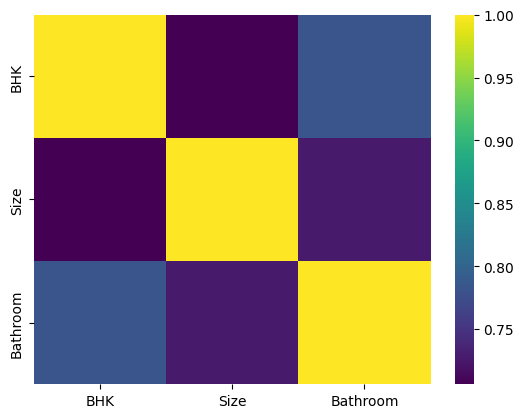

In [27]:
sns.heatmap(x_num.corr(), cmap = 'viridis')

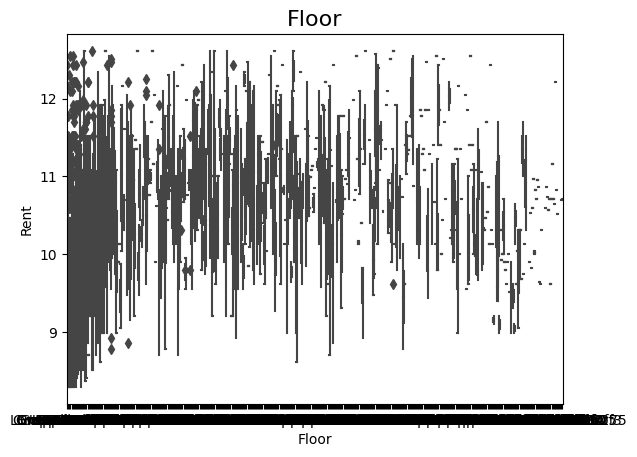

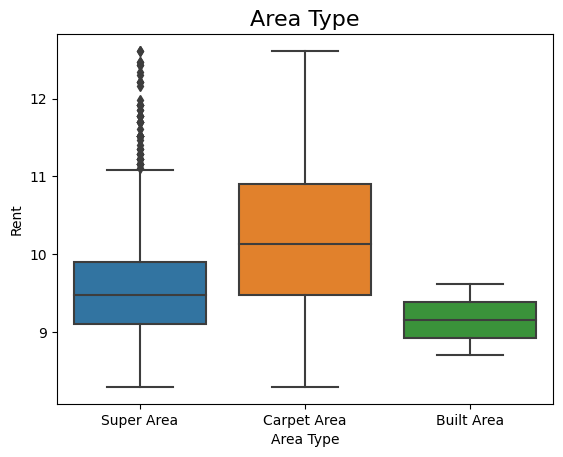

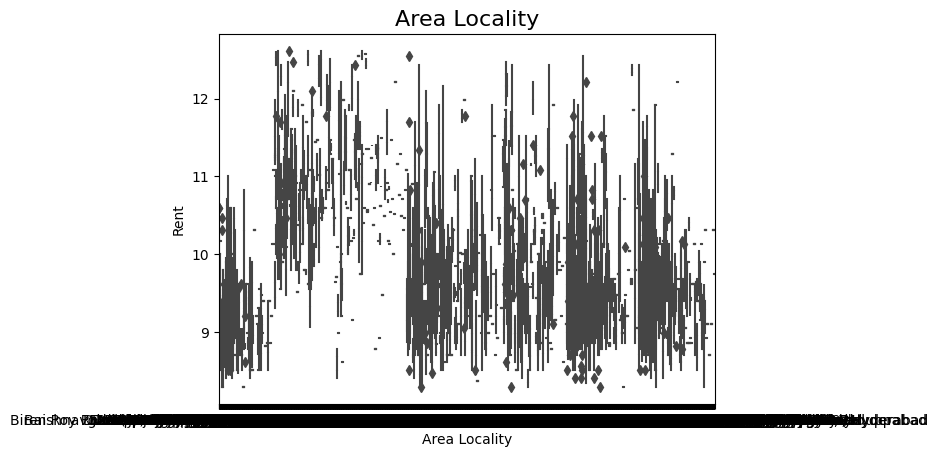

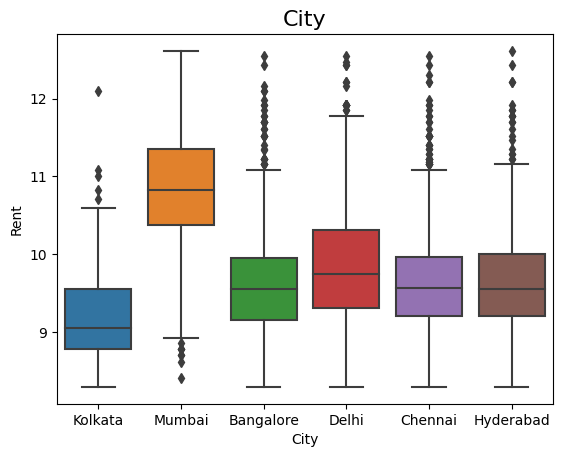

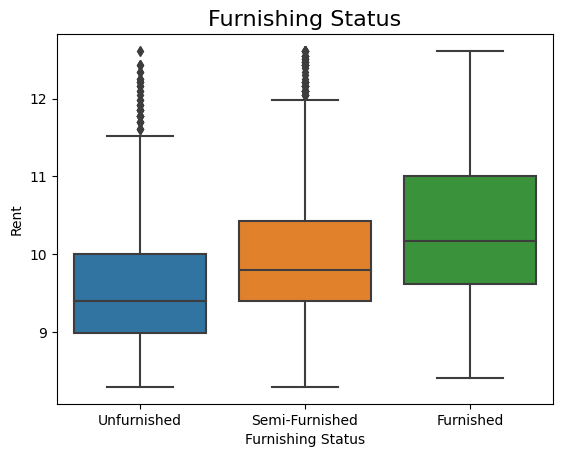

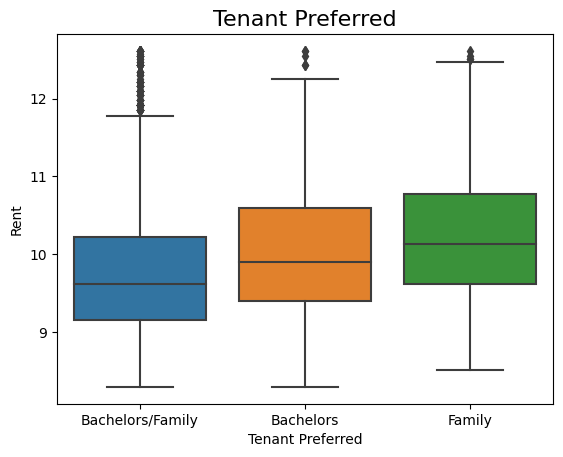

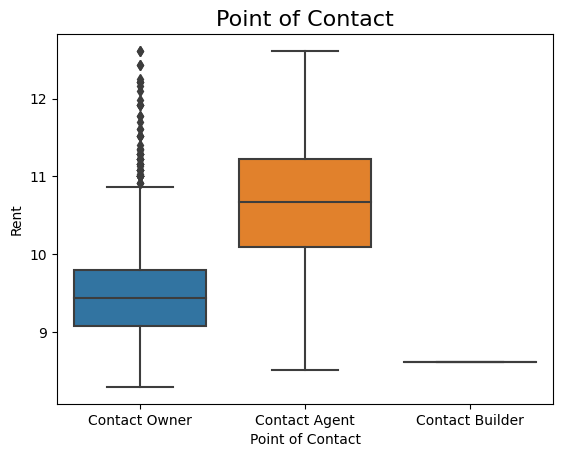

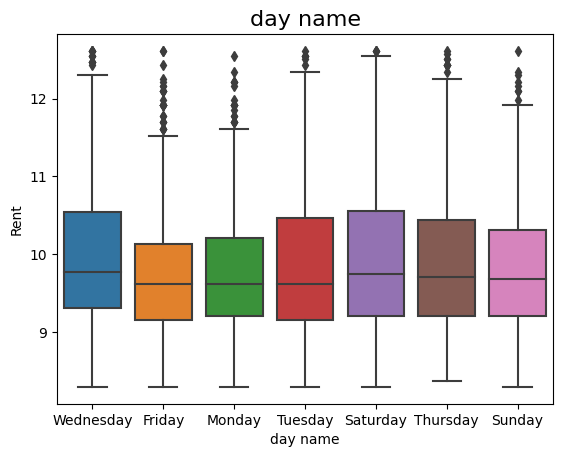

In [28]:
x_cat_all = pd.concat([x_cat, y], axis  = 1, join = 'inner')

for idx, val in enumerate(x_cat.columns):
    sns.boxplot(x = val, y = 'Rent', data  = x_cat_all)
    plt.title(val, fontsize = 16)
    plt.show()

In [29]:
#droping Some Features
x_cat1 = x_cat.drop(['Floor', 'Area Locality'], axis = 1)
x_cat1.shape

(4671, 6)

In [30]:
x_cat_dum = pd.get_dummies(x_cat1)
x_cat_dum.shape

(4671, 25)

In [31]:
x_all = pd.concat([x_num, x_cat_dum], axis =1, join = 'inner')
x_all.head()

,BHK,Size,Bathroom,Area Type_Built Area,Area Type_Carpet Area,Area Type_Super Area,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,...,Point of Contact_Contact Agent,Point of Contact_Contact Builder,Point of Contact_Contact Owner,day name_Friday,day name_Monday,day name_Saturday,day name_Sunday,day name_Thursday,day name_Tuesday,day name_Wednesday
0,2,1100,2,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,2,800,1,0,0,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
2,2,1000,1,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
3,2,800,1,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
4,2,850,1,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0


In [32]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x_all, y, random_state= 42)

In [33]:
# So We can say we have somewhat similar distribution
print(ytrain.mean())
print(ytest.mean())

9.860428807535055
9.874941870002406


In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
print(xtrain)
xtest = sc.transform(xtest)
print(xtest)

[[ 1.12998463  1.72813352  2.36459649 ...  2.15850125 -0.34779304
  -0.4655555 ]
 [-1.31267884 -0.99682699 -1.10552563 ... -0.46328442  2.87527316
  -0.4655555 ]
 [-1.31267884 -0.91425243 -1.10552563 ...  2.15850125 -0.34779304
  -0.4655555 ]
 ...
 [-0.09134711 -0.24539849  0.05118174 ... -0.46328442 -0.34779304
   2.14797161]
 [-0.09134711  0.0766423   0.05118174 ... -0.46328442  2.87527316
  -0.4655555 ]
 [-1.31267884 -0.74910331 -1.10552563 ... -0.46328442  2.87527316
  -0.4655555 ]]
[[-1.31267884 -0.58395419 -1.10552563 ... -0.46328442 -0.34779304
  -0.4655555 ]
 [-0.09134711 -0.58395419 -1.10552563 ... -0.46328442 -0.34779304
  -0.4655555 ]
 [ 1.12998463  0.24179142  1.20788911 ... -0.46328442 -0.34779304
  -0.4655555 ]
 ...
 [-0.09134711 -0.04721954  0.05118174 ... -0.46328442 -0.34779304
  -0.4655555 ]
 [-0.09134711 -0.48486471  0.05118174 ... -0.46328442 -0.34779304
   2.14797161]
 [ 1.12998463  0.57208966  1.20788911 ... -0.46328442 -0.34779304
   2.14797161]]


# Training and testing the model

##Linear Regression

In [35]:
### Using multiple linear regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
lr  = LinearRegression()
lr.fit(xtrain,ytrain)
lr.score(xtest, ytest)
y_pred_lr = lr.predict(xtest)
print('MAE', mean_absolute_error(ytest, y_pred_lr))
print('MSE', mean_squared_error(ytest, y_pred_lr))
print('r2_score', lr.score(xtest, ytest))

MAE 0.28709491983585017
MSE 0.14293203437860683
r2_score 0.8107482380836628


In [36]:
### intercept and coefficients
print(lr.intercept_)
print(lr.coef_)

9.85707597001742
[ 1.96636068e-01  2.40909036e-01  1.24976817e-01  7.90750982e+11
  1.65304137e+13  1.65313591e+13  3.96038190e+12  4.00457189e+12
  3.32822714e+12  3.87031418e+12  3.08232905e+12  4.01108757e+12
 -8.01405590e+12 -1.17361402e+13 -1.14363086e+13 -7.52981266e+12
 -8.87005824e+12 -5.93249218e+12  1.03514020e+13  3.77526396e+11
  1.03539927e+13 -9.61859738e+12 -8.91066901e+12 -9.35426059e+12
 -7.25475539e+12 -9.91844473e+12 -8.06810489e+12 -9.94978628e+12]


## ML models without hyperparameter Tuning

In [37]:
### Using multiple linear regression on ridge

from sklearn.linear_model import Ridge
# manually found alpha 133 gives  0.8134984502334537
rig  = Ridge()
rig.fit(xtrain,ytrain)
rig.score(xtest, ytest)
y_pred_rig = rig.predict(xtest)
print(y_pred_rig)
print('MAE', mean_absolute_error(ytest, y_pred_rig))
print('MSE', mean_squared_error(ytest, y_pred_rig))
print('r2_score', rig.score(xtest, ytest))

[ 8.95716331  9.27558499 10.45305377 ...  9.434119   10.90245862
 10.02805403]
MAE 0.285042890863965
MSE 0.14119241561140522
r2_score 0.8130516119787237


In [38]:
print(rig.intercept_)
print(rig.coef_)

9.860428807535055
[ 0.19486204  0.23165078  0.13558057 -0.00250879  0.00656151 -0.00644114
 -0.05833541 -0.07398733  0.00914799 -0.10869482 -0.13279324  0.33079983
  0.06822587  0.00514956 -0.05309422  0.01835402 -0.00174317 -0.0206895
  0.08218687 -0.00524948 -0.0819749   0.00756379  0.00093298  0.00599595
 -0.0029722  -0.00494685 -0.01506206  0.00552733]


In [39]:
### Using multiple linear regression on lasso
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.001)
lasso.fit(xtrain,ytrain)
lasso.score(xtest, ytest)
y_pred_lasso = lasso.predict(xtest)
print(y_pred_lasso)
print('MAE', mean_absolute_error(ytest, y_pred_lasso))
print('MSE', mean_squared_error(ytest, y_pred_lasso))
print('r2_score', lasso.score(xtest, ytest))

[ 8.95482449  9.27952284 10.45054299 ...  9.43955736 10.89657617
 10.03075741]
MAE 0.28494020659836966
MSE 0.14112306638198305
r2_score 0.8131434350883069


In [40]:
print(lasso.intercept_)
print(lasso.coef_)

9.860428807535055
[ 0.19436973  0.23060693  0.13591134 -0.00125948  0.01238701 -0.
  0.         -0.01342572  0.05802522 -0.04999187 -0.08596618  0.38982086
  0.06399694  0.         -0.05773921  0.01918841 -0.         -0.01841819
  0.16455404 -0.00130305 -0.          0.00505875 -0.          0.00370645
 -0.0033747  -0.00556474 -0.01544041  0.00299989]


In [41]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.1, random_state=42)
elastic_net.fit(xtrain,ytrain)
elastic_net.score(xtest, ytest)
y_pred_elastic = elastic_net.predict(xtest)
print('MAE', mean_absolute_error(ytest, y_pred_elastic))
print('MSE', mean_squared_error(ytest, y_pred_elastic))
print('r2_score', elastic_net.score(xtest, ytest))

MAE 0.2863613270427255
MSE 0.14241234720698603
r2_score 0.811436339343133


##Hyper Parameter Tuning using Cross Validation

In [42]:
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV

In [43]:
# Creating Ridge regression Model
ridge = Ridge()

# Defining Search space for Alpha
# alphas_ridge = np.logspace(-10, 2, num=100)
alphas_ridge = np.linspace(33,36,1000)

# Perform grid search with cross-validation
param_grid_ridge = {'alpha': alphas_ridge}
grid_search_ridge = GridSearchCV(ridge, param_grid=param_grid_ridge, cv=5, scoring='r2')
grid_search_ridge.fit(xtrain, ytrain)

# Get the best alpha from grid search results
best_alpha_ridge = grid_search_ridge.best_params_['alpha']

# Train the Ridge regression model with the best alpha on the full dataset
ridge_best = Ridge(alpha= best_alpha_ridge)

ridge_best.fit(xtrain, ytrain)
ridge_r2_val = ridge_best.score(xtest, ytest)

print("R2 score for Ridge regression:", ridge_r2_val)
print(best_alpha_ridge)

R2 score for Ridge regression: 0.8132530125395337
33.0


In [44]:
# Creating Lasso regression Model
lasso = Lasso()

# Defining Search space for Alpha
# alphas_lasso = np.logspace(-10, 2, num=100)
alphas_lasso = np.linspace(0.0005,0.0015,100)

# Perform grid search with cross-validation
param_grid_lasso = {'alpha': alphas_lasso}
grid_search_lasso = GridSearchCV(lasso, param_grid=param_grid_lasso, cv=5, scoring='r2')
grid_search_lasso.fit(xtrain, ytrain)

# Get the best alpha from grid search results
best_alpha_lasso = grid_search_lasso.best_params_['alpha']

# Train the Lasso regression model with the best alpha on the full dataset
lasso_best = Lasso(alpha= best_alpha_lasso)

lasso_best.fit(xtrain, ytrain)
lasso_r2_val = lasso_best.score(xtest, ytest)

print("R2 score for lasso regression:", lasso_r2_val)
print(best_alpha_lasso)

R2 score for lasso regression: 0.8131770087669821
0.0015


In [45]:
# Create ElasticNet regression model
elastic_net = ElasticNet()

# Define alpha values to search using a logarithmic scale between 10^-6 and 10^3
# alphas = np.logspace(-1, 1, num=100)
alphas = np.linspace(0.008, 0.010, num=10)
# Define l1_ratio values to search from 0.1 to 1.0
l1_ratios = np.linspace(0.01, 0.2, num=10)

# Create the parameter grid with alpha and l1_ratio combinations
param_grid = {'alpha': alphas,
              'l1_ratio': l1_ratios}

# Perform grid search with cross-validation
grid_search = GridSearchCV(elastic_net, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(xtrain, ytrain)

# Get the best alpha and l1_ratio from grid search results
best_alpha = grid_search.best_params_['alpha']
best_l1_ratio = grid_search.best_params_['l1_ratio']

# Train the ElasticNet regression model with the best alpha and l1_ratio on the full dataset
elastic_net_best = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio)
elastic_net_best.fit(xtrain, ytrain)
elastic_net_r2_val = elastic_net_best.score(xtest, ytest)

print("R2 score Elastic-net regression:", elastic_net_r2_val)
print(best_alpha,best_l1_ratio)

R2 score Elastic-net regression: 0.8134018927512991
0.008888888888888889 0.2
